With all the necessary datasets downloaded, and after splitting up scenes into training chips, we are ready to train our deep learning model. Prior to this, it is useful to examine a few of the input chips to get an idea of what is being provided to the model for training. 
We will use the dataloader class to load up our dataset, and randomly plot a few samples from our training dataset

In [1]:
from pathlib import Path
from dataloader import sarDataLoader
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
from functools import partial

random.seed(10) # so that the images are repeatable

/u/trappist-r0/karthikv/mambaforge/envs/dl-with-alos-dswe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = Path('../data/training_data/chips/training_data.csv')
df = pd.read_csv(dataset_path)
df.head()

,Unnamed: 0,hh,hv,red,nir,swir1,swir2,dem,hand,labels
0,0,../data/training_data/chips/hh/AP_197080780_00...,../data/training_data/chips/hv/AP_197080780_00...,../data/training_data/chips/red/AP_197080780_0...,../data/training_data/chips/nir/AP_197080780_0...,../data/training_data/chips/swir1/AP_197080780...,../data/training_data/chips/swir2/AP_197080780...,../data/training_data/chips/dem/AP_197080780_0...,../data/training_data/chips/hand/AP_197080780_...,../data/training_data/chips/labels/AP_19708078...
1,1,../data/training_data/chips/hh/AP_197080780_00...,../data/training_data/chips/hv/AP_197080780_00...,../data/training_data/chips/red/AP_197080780_0...,../data/training_data/chips/nir/AP_197080780_0...,../data/training_data/chips/swir1/AP_197080780...,../data/training_data/chips/swir2/AP_197080780...,../data/training_data/chips/dem/AP_197080780_0...,../data/training_data/chips/hand/AP_197080780_...,../data/training_data/chips/labels/AP_19708078...
2,2,../data/training_data/chips/hh/AP_197080780_00...,../data/training_data/chips/hv/AP_197080780_00...,../data/training_data/chips/red/AP_197080780_0...,../data/training_data/chips/nir/AP_197080780_0...,../data/training_data/chips/swir1/AP_197080780...,../data/training_data/chips/swir2/AP_197080780...,../data/training_data/chips/dem/AP_197080780_0...,../data/training_data/chips/hand/AP_197080780_...,../data/training_data/chips/labels/AP_19708078...
3,3,../data/training_data/chips/hh/AP_197080780_00...,../data/training_data/chips/hv/AP_197080780_00...,../data/training_data/chips/red/AP_197080780_0...,../data/training_data/chips/nir/AP_197080780_0...,../data/training_data/chips/swir1/AP_197080780...,../data/training_data/chips/swir2/AP_197080780...,../data/training_data/chips/dem/AP_197080780_0...,../data/training_data/chips/hand/AP_197080780_...,../data/training_data/chips/labels/AP_19708078...
4,4,../data/training_data/chips/hh/AP_197080780_00...,../data/training_data/chips/hv/AP_197080780_00...,../data/training_data/chips/red/AP_197080780_0...,../data/training_data/chips/nir/AP_197080780_0...,../data/training_data/chips/swir1/AP_197080780...,../data/training_data/chips/swir2/AP_197080780...,../data/training_data/chips/dem/AP_197080780_0...,../data/training_data/chips/hand/AP_197080780_...,../data/training_data/chips/labels/AP_19708078...


In [3]:
print(f"Total number of training samples: {len(df)}")

Total number of training samples: 8694


In [4]:
dataset = sarDataLoader(x_paths = df.drop(['labels'], axis=1), y_paths = df[['labels']])

In [5]:
def generate_plot(training_input):
    fig, ax = plt.subplots(2, 4, figsize=(24, 10))
    im = ax[0][0].imshow(training_input[0], cmap='gray')
    ax[0][0].set_title('HH image')
    ax[0][0].set_xticks([])
    cbar = plt.colorbar(im, ax=ax[0][0], fraction = 0.0475)
    cbar.set_label('Backscatter amplitude ($\gamma_0$) (dB)')

    im = ax[0][1].imshow(training_input[1], cmap='gray')
    ax[0][1].set_title('HV image')
    cbar = plt.colorbar(im, ax=ax[0][1], fraction = 0.0475)
    cbar.set_label('Backscatter amplitude ($\gamma_0$) (dB)')
    ax[0][1].set_xticks([])
    ax[0][1].set_yticks([])

    im = ax[0][2].imshow(training_input[2], cmap='OrRd')
    cbar = plt.colorbar(im, ax=ax[0][2], fraction = 0.0475)
    cbar.set_label('DN')
    ax[0][2].set_title('Red image')
    ax[0][2].set_xticks([])
    ax[0][2].set_yticks([])

    im = ax[0][3].imshow(training_input[3], cmap='OrRd')
    ax[0][3].set_title('NIR image')
    cbar = plt.colorbar(im, ax=ax[0][3], fraction = 0.0475)
    cbar.set_label('DN')
    ax[0][3].set_xticks([])
    ax[0][3].set_yticks([])

    im = ax[1][0].imshow(training_input[4], cmap = 'Oranges')
    ax[1][0].set_title('SWIR1 image')
    cbar = plt.colorbar(im, ax=ax[1][0], fraction = 0.0475)
    cbar.set_label('DN')

    im = ax[1][1].imshow(training_input[5], cmap = 'Oranges')
    ax[1][1].set_title('SWIR2 image')
    ax[1][1].set_yticks([])
    cbar = plt.colorbar(im, ax=ax[1][1], fraction = 0.0475)
    cbar.set_label('DN')

    im = ax[1][2].imshow(training_input[6])
    ax[1][2].set_title('DEM image')
    ax[1][2].set_yticks([])
    cbar = plt.colorbar(im, ax=ax[1][2], fraction = 0.0475)
    cbar.set_label('meters')

    im = ax[1][3].imshow(training_input[7])
    ax[1][3].set_title('HAND image')
    ax[1][3].set_yticks([])
    cbar = plt.colorbar(im, ax=ax[1][3], fraction = 0.0475)
    cbar.set_label('meters')

### Example 1

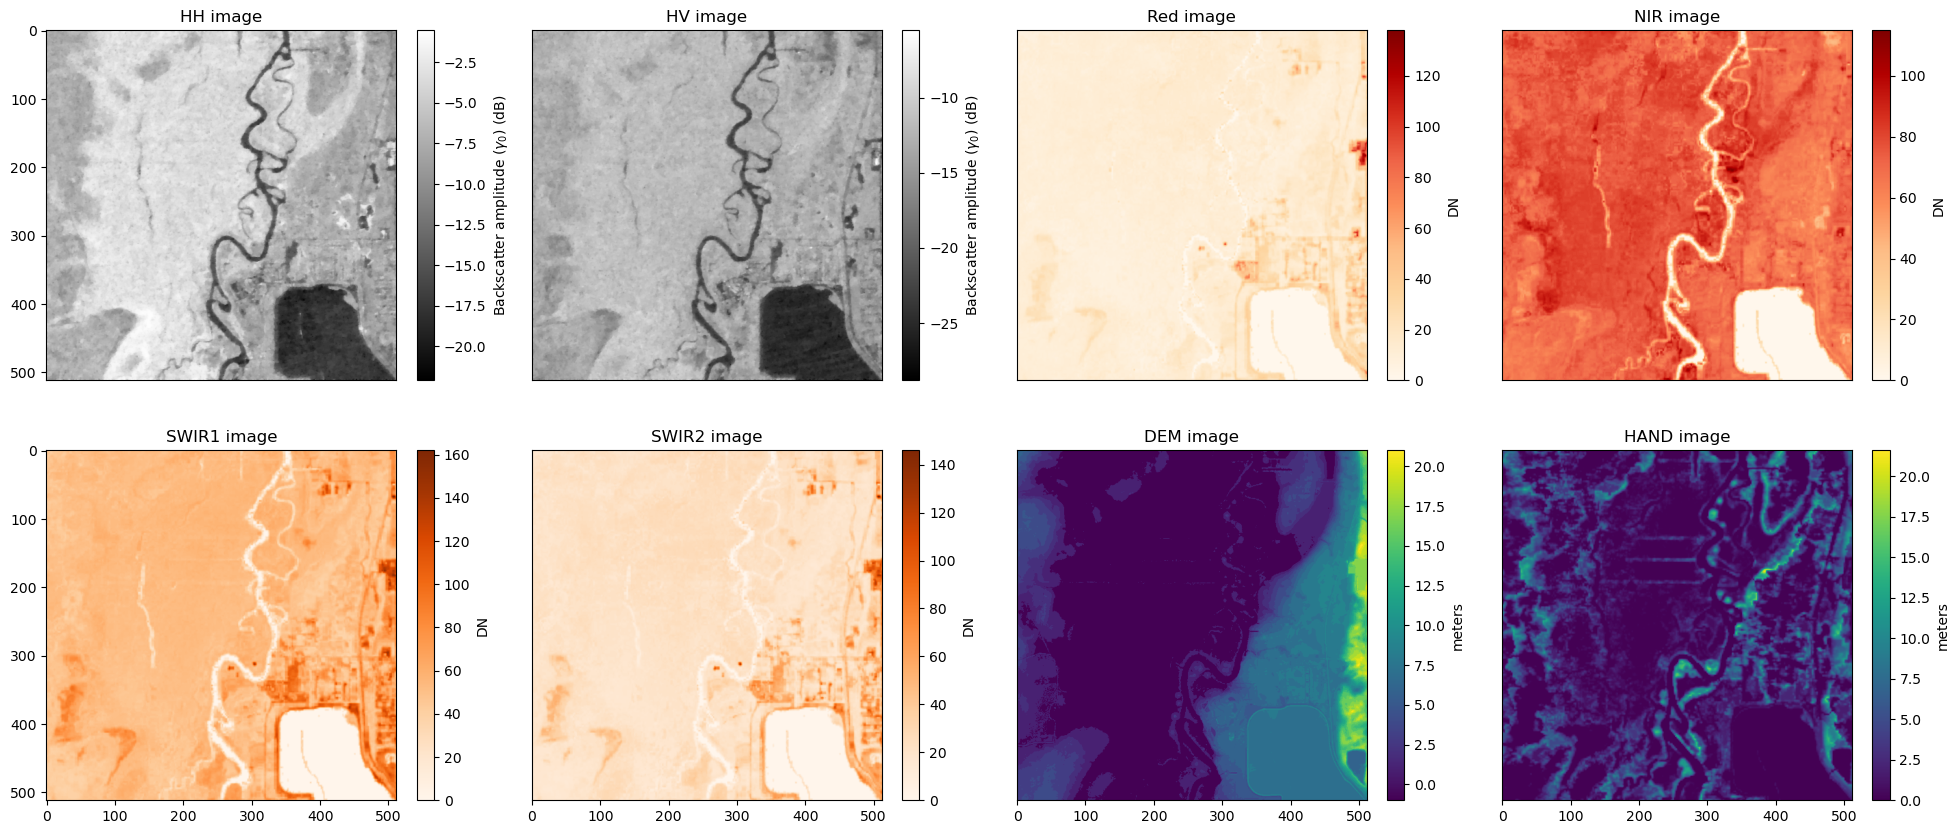

In [6]:
idx = random.choice(range(len(dataset)))
training_input, training_label = dataset.__getitem__(idx, inference=False)
generate_plot(training_input)

### Note that the SAR images returned by the dataloader are in log units (dB scale), the optical channel data are in units of digital numbers (DN), and the DEM and HAND data are in units of meters.

In [7]:
def generate_label_plot(training_label):
    labelmap = mpl.colors.ListedColormap(["navy", "lawngreen", "white"])

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    training_label[training_label==255]=2
    im = ax.imshow(training_label, cmap=labelmap, interpolation=None)
    ax.set_title('Training Labels')

    cbar = fig.colorbar(im, ax=ax, fraction = 0.045, ticks=[0, 1, 2])
    cbar.ax.set_yticklabels(['water', 'not water', 'no data'])

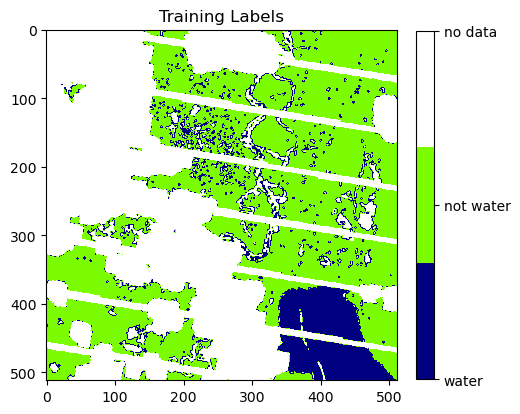

In [8]:
generate_label_plot(training_label)

### Example 2

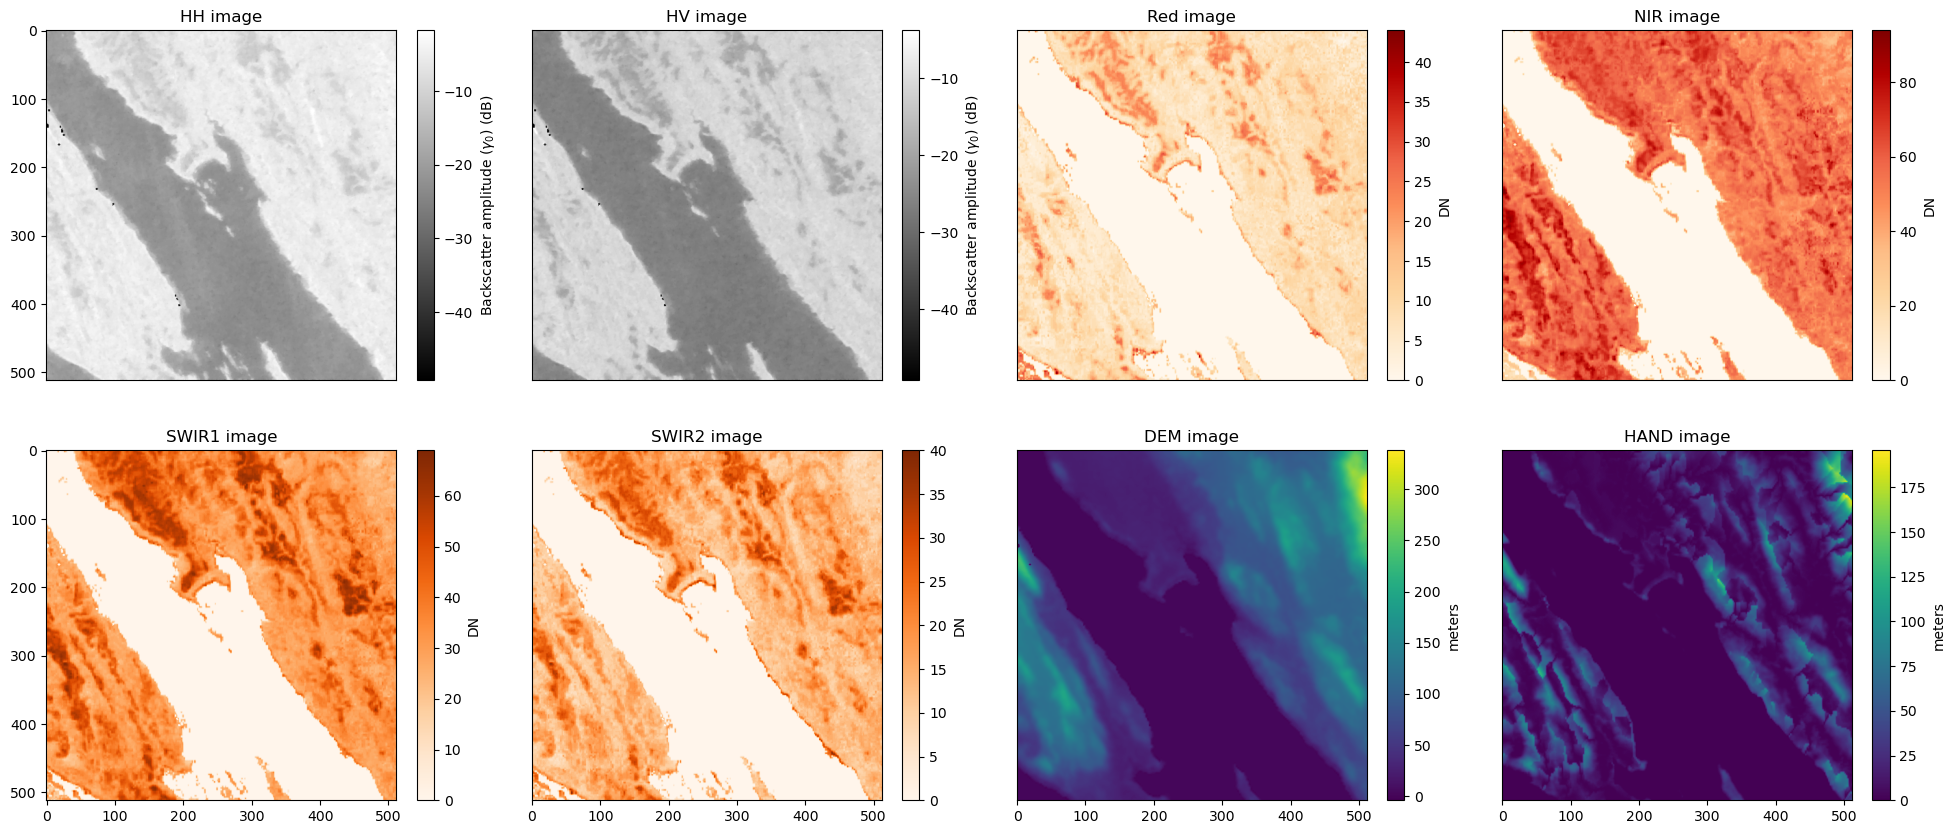

In [9]:
idx = random.choice(range(len(dataset)))
training_input, training_label = dataset.__getitem__(idx, inference=False)
generate_plot(training_input)

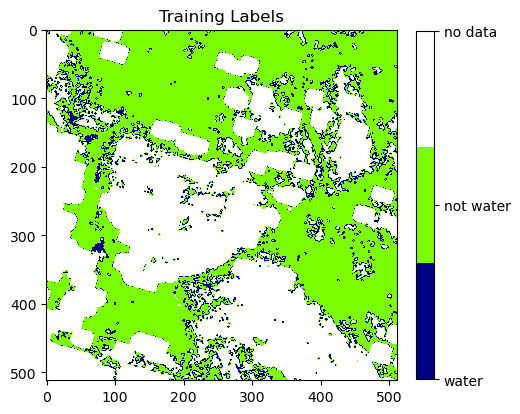

In [10]:
generate_label_plot(training_label)

### Example 3

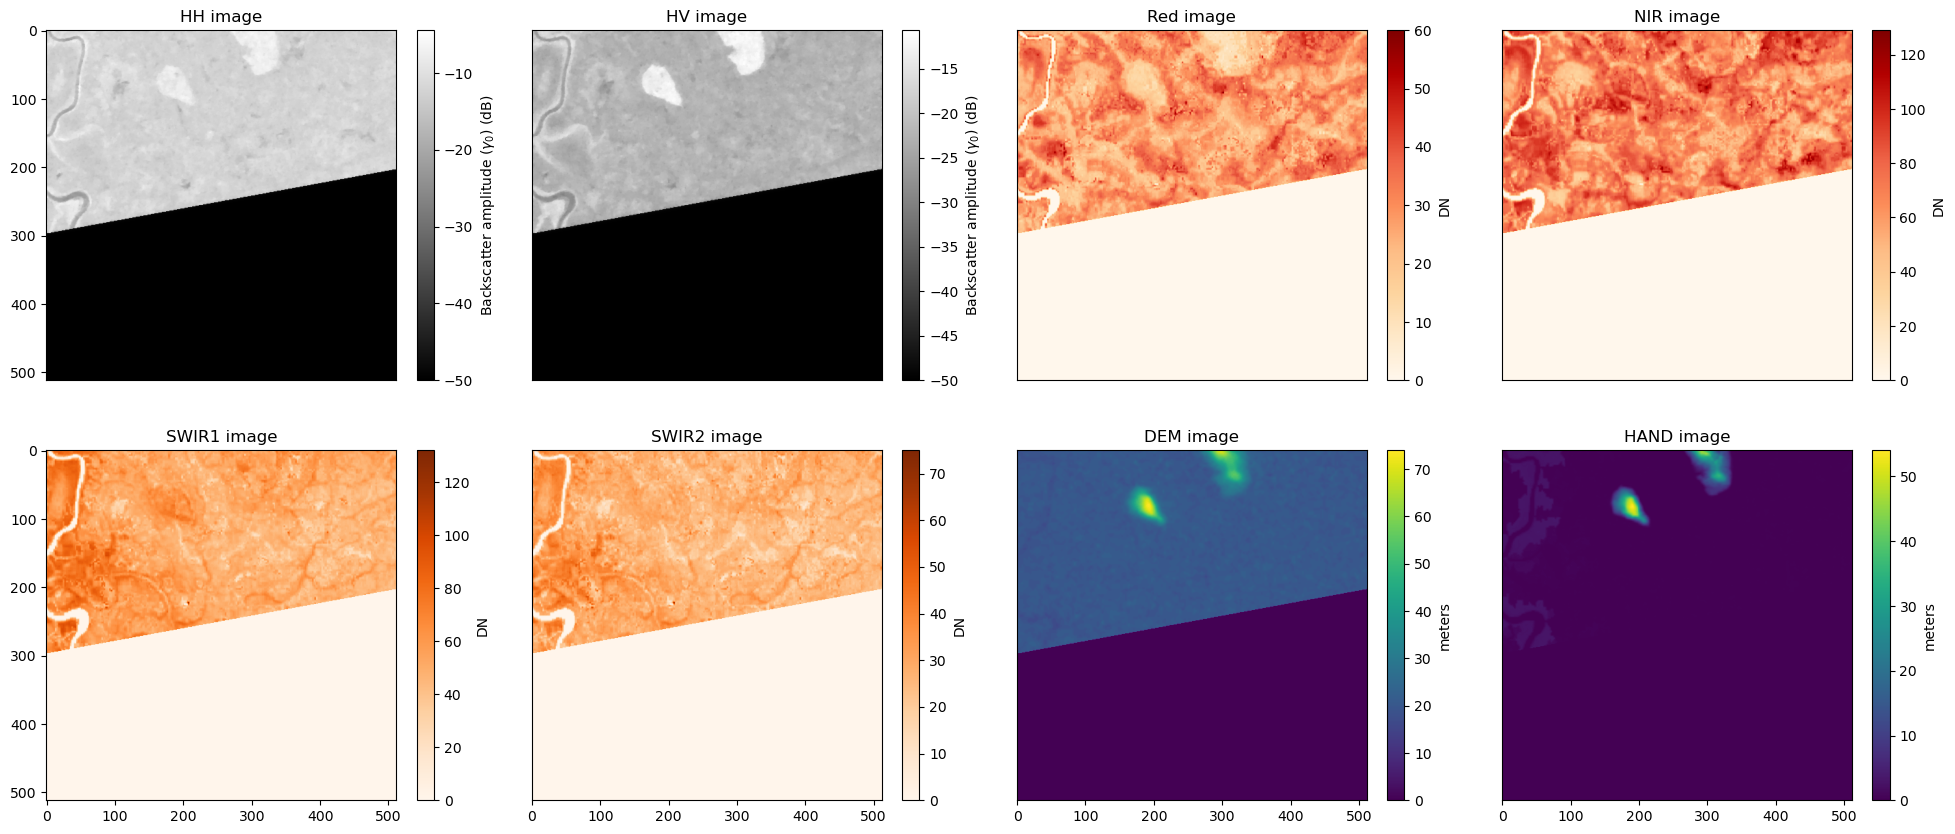

In [11]:
idx = random.choice(range(len(dataset)))
training_input, training_label = dataset.__getitem__(idx, inference=False)
generate_plot(training_input)

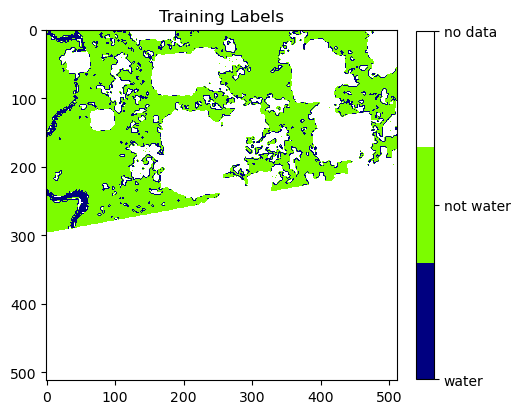

In [12]:
generate_label_plot(training_label)

## Pixel statistics

In [13]:
# We randomly pick 1000 images to calculate the mean and std of NW, OW and no-data pixels. We are interested in knowing the percentage distribution of not-water, open-water, and no-data classes

def return_class_percentages(dataset, idx):
    _, img = dataset.__getitem__(idx, inference=False)
    n_pixels = 262144 # all images are 512 x 512
    nw_fraction = np.sum(img==1)/n_pixels
    ow_fraction = np.sum(img==0)/n_pixels
    nodata_fraction = np.sum(img==255)/n_pixels

    return [nw_fraction, ow_fraction, nodata_fraction]
    
fractions = []
idxs = random.sample(list(range(len(df))), 1000)
fractions.extend(list(map(partial(return_class_percentages, dataset), idxs)))

def return_statistics(fraction_list, idx):
    fractions = [x[idx] for x in fraction_list]
    print(f"Length of list for idx {idx}: {len(fractions)}")
    return np.mean(fractions), np.median(fractions), np.std(fractions)

statistics = [return_statistics(fractions, idx) for idx in [0, 1, 2]]

print(statistics)

Length of list for idx 0: 1000
Length of list for idx 1: 1000
Length of list for idx 2: 1000
[(0.34178341674804685, 0.2692127227783203, 0.33194321169353985), (0.33886890029907224, 0.18761634826660156, 0.3427570415976347), (0.31934768295288085, 0.268280029296875, 0.26066647206045473)]


We see that on average, the fraction of a training sample contains nearly equal portions NW, OW and no-data. However, there is significant variability in each chip. The median value for the open water class is about 18%, while that of NW is 27%. A significant portion of the image is always no-data.